In [21]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [22]:
np.random.seed(42)

In [30]:
n_samples = 300
data = {
    'Age': np.random.randint(18, 70, n_samples),
    'Income': np.random.normal(60000, 20000, n_samples),
    'Purchase_Frequency': np.random.randint(1, 20, n_samples),
    'Spending': np.random.normal(1000, 400, n_samples)
}

In [31]:
df = pd.DataFrame(data)

In [32]:
df.head()

,Age,Income,Purchase_Frequency,Spending
0,52,63818.755015,17,1174.623922
1,66,42108.735352,15,1361.573936
2,42,42377.857009,17,54.827026
3,41,92319.170067,13,596.107718
4,29,99433.375009,19,1247.661704


In [33]:
df.tail()


,Age,Income,Purchase_Frequency,Spending
295,18,45790.949003,14,1169.624418
296,52,59633.019582,6,810.464261
297,23,86235.678004,2,994.219092
298,54,41025.563542,1,1218.513699
299,22,16763.090765,10,1002.568908


In [34]:
df.describe()

,Age,Income,Purchase_Frequency,Spending
count,300.000000,300.000000,300.000000,300.000000
mean,43.090000,60617.660791,10.420000,1022.908367
std,14.886479,20413.496926,5.444484,383.567862
min,18.000000,9699.230949,1.000000,-81.292917
25%,30.000000,46559.952698,5.750000,756.476495
50%,43.000000,61362.249413,11.000000,1008.421071
75%,56.000000,74772.365713,15.000000,1298.643844
max,69.000000,113994.282808,19.000000,2277.243027


In [35]:
df.shape

(300, 4)

In [36]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [37]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [38]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=df.columns[:-1])
print("Cluster Centers:")
print(centers_df)

Cluster Centers:
         Age        Income  Purchase_Frequency     Spending
0  55.142857  46982.614084            5.415584  1011.416445
1  35.012048  51925.835558           15.180723   840.015104
2  29.183099  71185.148073            6.676056  1016.805827
3  53.666667  75415.175192           14.130435  1262.014151


In [39]:
print("\nCluster Sizes:")
print(df['Cluster'].value_counts())


Cluster Sizes:
Cluster
1    83
0    77
2    71
3    69
Name: count, dtype: int64


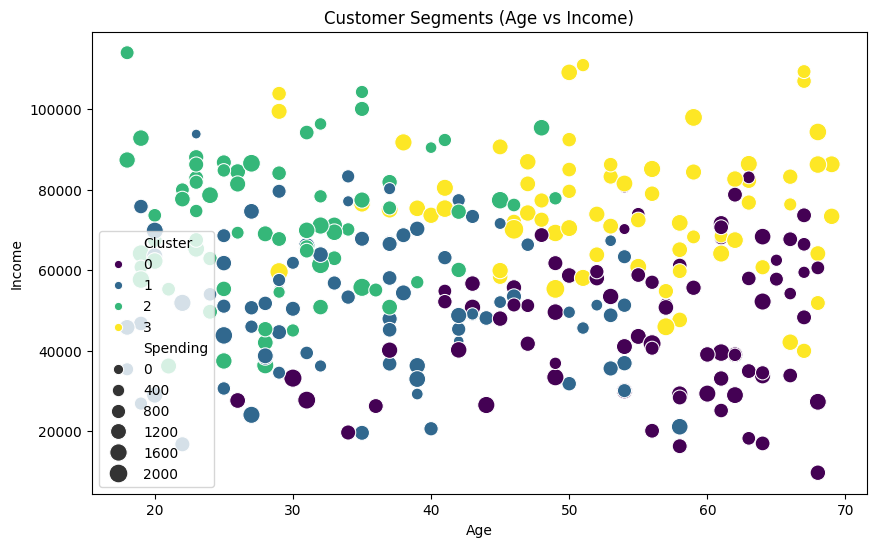

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', hue='Cluster', size='Spending', 
                sizes=(50, 200), palette='viridis', data=df)
plt.title('Customer Segments (Age vs Income)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


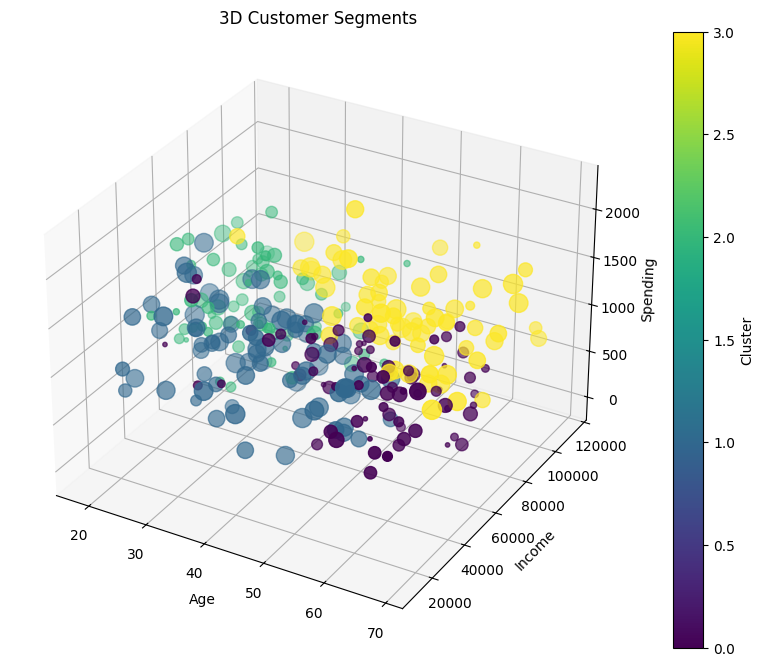

In [41]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Income'], df['Spending'], 
                    c=df['Cluster'], s=df['Purchase_Frequency']*10, 
                    cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending')
plt.title('3D Customer Segments')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [42]:
print("\nCustomer Segment Interpretations:")
for i in range(4):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"Average Age: {cluster_data['Age'].mean():.1f}")
    print(f"Average Income: ${cluster_data['Income'].mean():.2f}")
    print(f"Average Purchase Frequency: {cluster_data['Purchase_Frequency'].mean():.1f}")
    print(f"Average Spending: ${cluster_data['Spending'].mean():.2f}")


Customer Segment Interpretations:

Cluster 0:
Average Age: 55.1
Average Income: $46982.61
Average Purchase Frequency: 5.4
Average Spending: $1011.42

Cluster 1:
Average Age: 35.0
Average Income: $51925.84
Average Purchase Frequency: 15.2
Average Spending: $840.02

Cluster 2:
Average Age: 29.2
Average Income: $71185.15
Average Purchase Frequency: 6.7
Average Spending: $1016.81

Cluster 3:
Average Age: 53.7
Average Income: $75415.18
Average Purchase Frequency: 14.1
Average Spending: $1262.01
